**Name -: Nihaal Patel**

**Roll No.-: 045035 Section-H (BDA-04)**





---

# **Machine Learning For Managers (Term-03)**

# **Project -03**



---



# **Project Title -:**

# **Optimizing Urban Traffic Flow through Supervised Machine Learning > Cross Validation | Ensemble Methods > | Random Forest | XGBoost**

###"Analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption."



---



###**This Project consists of broadly 2 sections-:**

**PART A-** CODING & OUTPUTS

**PART B-** PROJECT REPORT



---



# **PART A- CODING & OUTPUTS**



---



###**Importing & Loading Libraries**

In [4]:
# Install PyDataset
!pip install pydataset

# @title load library { display-mode: "form" }
# Load IPython extension for measuring time
!pip install ipython-autotime
%reload_ext autotime

# Load IPython extension for memory profiling
!pip install memory-profiler
%reload_ext memory_profiler

time: 6.44 s (started: 2024-04-13 14:43:03 +00:00)


In [5]:
# Required Libraries
## Data Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from collections import Counter
from scipy import stats
from sklearn.tree import plot_tree
import graphviz
from IPython.display import display
from collections import Counter

from memory_profiler import memory_usage
import time

## Data Preprocessing Libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score
from sklearn.tree import export_text

## Machine Learning Models and Evaluation Metrics
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz

time: 3.11 s (started: 2024-04-13 14:43:10 +00:00)


In [6]:
# Track start time
start_time = time.time()

# Track initial memory usage
initial_memory = memory_usage()[0]

time: 101 ms (started: 2024-04-13 14:43:13 +00:00)




---



###**Data Imporitng & Reading**

In [7]:
# Import & Read Dataset
file_path = "/content/Data_P2.csv"

df = pd.read_csv(file_path)

# Display & Describe Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53901 entries, 0 to 53900
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  53901 non-null  int64  
 1   cluster_number         53901 non-null  int64  
 2   City                   53901 non-null  object 
 3   Vehicle Type           53901 non-null  object 
 4   Weather                53901 non-null  object 
 5   Economic Condition     53901 non-null  object 
 6   Day Of Week            53901 non-null  object 
 7   Hour Of Day            53901 non-null  int64  
 8   Speed                  53901 non-null  float64
 9   Is Peak Hour           53901 non-null  int64  
 10  Random Event Occurred  53901 non-null  int64  
 11  Energy Consumption     53901 non-null  float64
 12  Traffic Density        53901 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 5.3+ MB
time: 200 ms (started: 2024-04-13 14:43:13 +00:00

#### **Categorical Variables**

In [8]:
# Subset of Categorical Variables
df_cat = df[['index','cluster_number','City', 'Weather', 'Economic Condition', 'Day Of Week', 'Vehicle Type']]
df_cat

,index,cluster_number,City,Weather,Economic Condition,Day Of Week,Vehicle Type
0,0,2,SolarisVille,Snowy,Stable,Sunday,Drone
1,1,1,AquaCity,Solar Flare,Recession,Wednesday,Flying Car
2,2,1,Neuroburg,Solar Flare,Recession,Wednesday,Autonomous Vehicle
3,3,0,Ecoopolis,Clear,Booming,Thursday,Drone
4,4,2,AquaCity,Solar Flare,Stable,Saturday,Autonomous Vehicle
...,...,...,...,...,...,...,...
53896,53896,2,MetropolisX,Snowy,Booming,Friday,Autonomous Vehicle
53897,53897,0,Neuroburg,Electromagnetic Storm,Recession,Tuesday,Autonomous Vehicle
53898,53898,1,AquaCity,Solar Flare,Booming,Saturday,Autonomous Vehicle
53899,53899,1,MetropolisX,Solar Flare,Recession,Saturday,Autonomous Vehicle


time: 137 ms (started: 2024-04-13 14:43:13 +00:00)


####**Non-Categorical Variables**

In [9]:
# Subset of Non-Categorical Variables
df_noncat = df[['Speed', 'Energy Consumption', 'Traffic Density','Is Peak Hour']]
df_noncat

,Speed,Energy Consumption,Traffic Density,Is Peak Hour
0,29.4268,14.7134,0.5241,0
1,118.8000,143.5682,0.3208,0
2,100.3904,91.2640,0.0415,0
3,76.8000,46.0753,0.1811,1
4,45.2176,40.1934,0.4544,0
...,...,...,...,...
53896,45.8221,43.8489,0.4784,0
53897,38.7085,37.0417,0.0424,0
53898,90.7418,72.5934,0.5811,0
53899,60.8918,87.8670,0.1985,0


time: 52.3 ms (started: 2024-04-13 14:43:13 +00:00)


####**b.) Descriptive Statistics of Categorical Variables**

In [10]:
#For City
City_stats = pd.concat([df['City'].value_counts(), df['City'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
City_stats

,City,count,percentage
0,Ecoopolis,9129,17.0
1,AquaCity,9049,17.0
2,SolarisVille,9013,17.0
3,TechHaven,8947,17.0
4,MetropolisX,8921,17.0
5,Neuroburg,8842,16.0


time: 27.6 ms (started: 2024-04-13 14:43:14 +00:00)


In [11]:
#For Weather
Weather_stats = pd.concat([df['Weather'].value_counts(), df['Weather'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
Weather_stats

,Weather,count,percentage
0,Rainy,10922,20.0
1,Electromagnetic Storm,10846,20.0
2,Snowy,10759,20.0
3,Clear,10727,20.0
4,Solar Flare,10647,20.0


time: 28.4 ms (started: 2024-04-13 14:43:14 +00:00)


In [12]:
#For Economic_Condition
Economic_Condition_stats = pd.concat([df['Economic Condition'].value_counts(), df['Economic Condition'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
Economic_Condition_stats

,Economic Condition,count,percentage
0,Stable,18050,33.0
1,Recession,17953,33.0
2,Booming,17898,33.0


time: 22.8 ms (started: 2024-04-13 14:43:14 +00:00)


In [13]:
#For Day Of Week
Day_Of_Week_stats = pd.concat([df['Day Of Week'].value_counts(), df['Day Of Week'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
Day_Of_Week_stats

,Day Of Week,count,percentage
0,Thursday,7763,14.0
1,Tuesday,7749,14.0
2,Saturday,7746,14.0
3,Wednesday,7714,14.0
4,Monday,7665,14.0
5,Sunday,7646,14.0
6,Friday,7618,14.0


time: 31.9 ms (started: 2024-04-13 14:43:14 +00:00)


In [14]:
#For Vehicle Type
Vehicle_Type_stats = pd.concat([df['Vehicle Type'].value_counts(), df['Vehicle Type'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
Vehicle_Type_stats

,Vehicle Type,count,percentage
0,Autonomous Vehicle,33357,62.0
1,Drone,13493,25.0
2,Flying Car,3575,7.0
3,Car,3476,6.0


time: 29.9 ms (started: 2024-04-13 14:43:14 +00:00)


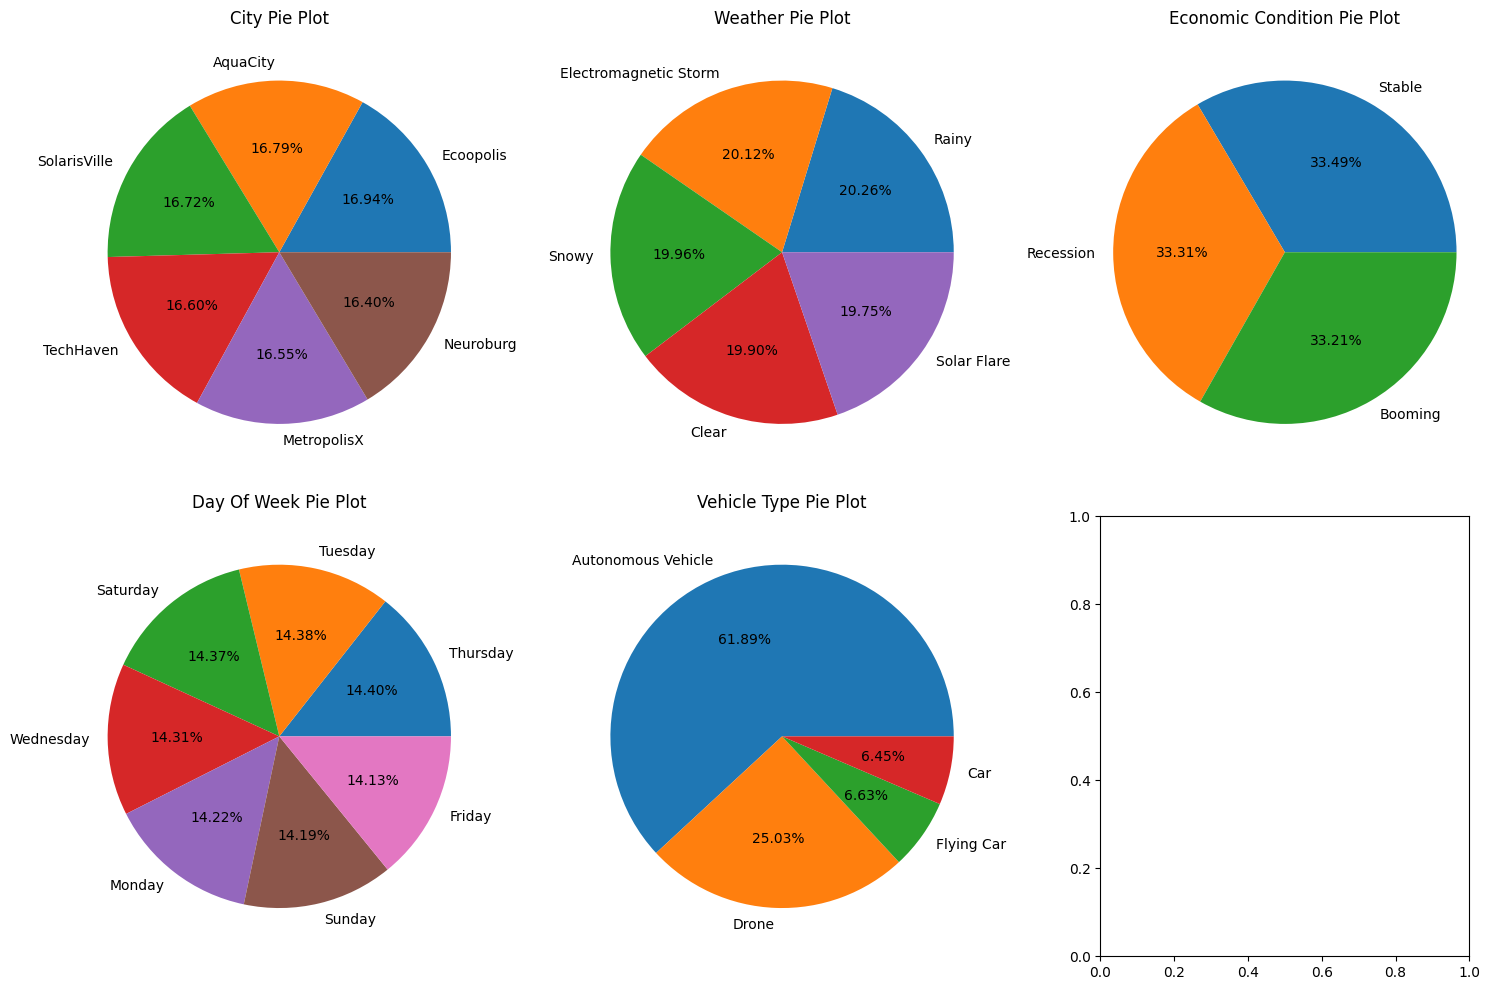

time: 963 ms (started: 2024-04-13 14:43:14 +00:00)


In [15]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


# Plot pie charts for each categorical variable
variables = ['City', 'Weather', 'Economic Condition', 'Day Of Week', 'Vehicle Type']
stats_dict = {}

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3

    stats_dict[var] = pd.concat([df[var].value_counts(), df[var].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()

    axes[row, col].pie(stats_dict[var]['count'], labels=stats_dict[var][var], autopct='%0.2f%%')
    axes[row, col].set_title(f'{var} Pie Plot')
    axes[row, col].axis('equal')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

####**c.) Descriptive Statistics of Non-Categorical Variables**

**1.) Speed**

Mean of Speed is = 59.95
St. Dev. of Speed is = 26.57


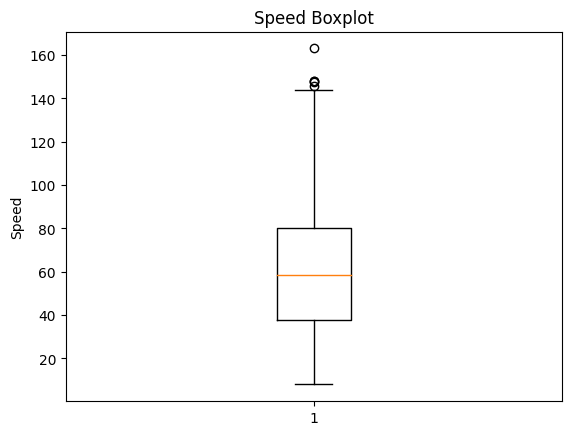

time: 273 ms (started: 2024-04-13 14:43:15 +00:00)


In [16]:
# Mean (Speed)
Speed_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Speed is =", Speed_mean)
# Std. Dev. (mpg)
Speed_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Speed is =", Speed_sd)

plt.boxplot(df_noncat['Speed'])
plt.ylabel('Speed')
plt.title('Speed Boxplot')
plt.show()


**2.) Energy Consumption**

Mean of Energy Consumption is = 59.95
St. Dev. of Energy Consumption is = 59.95


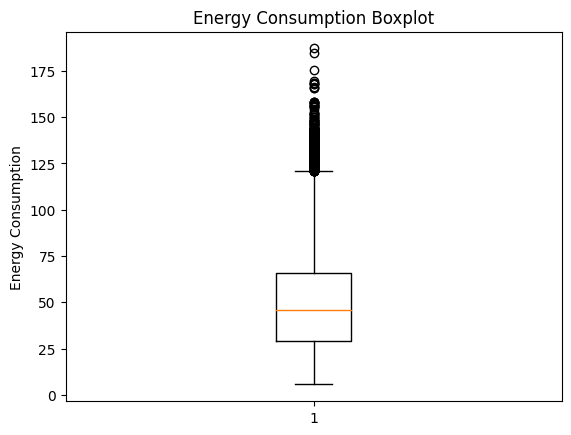

time: 204 ms (started: 2024-04-13 14:43:15 +00:00)


In [17]:
# Mean (Energy Consumption)
Energy_Consumption_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Energy Consumption is =", Energy_Consumption_mean)
# Std. Dev. (mpg)
Energy_Consumption_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Energy Consumption is =", Energy_Consumption_mean)

plt.boxplot(df_noncat['Energy Consumption'])
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Boxplot')
plt.show()

**3.) Traffic Density**

Mean of Traffic Density is = 59.95
St. Dev. of Traffic Density is = 26.57


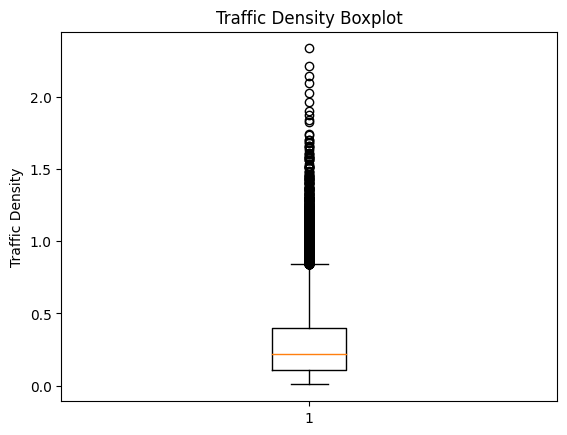

time: 195 ms (started: 2024-04-13 14:43:15 +00:00)


In [18]:
# Mean (Traffic Density)
Traffic_Density_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Traffic Density is =", Traffic_Density_mean)
# Std. Dev. (mpg)
Traffic_Density_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Traffic Density is =", Traffic_Density_sd)

plt.boxplot(df_noncat['Traffic Density'])
plt.ylabel('Traffic Density')
plt.title('Traffic Density Boxplot')
plt.show()

###**Data Pre-Processing**

###**Missing Data Information**

In [19]:
# Dataframe Information (Provide Information on Missing Data)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53901 entries, 0 to 53900
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  53901 non-null  int64  
 1   cluster_number         53901 non-null  int64  
 2   City                   53901 non-null  object 
 3   Vehicle Type           53901 non-null  object 
 4   Weather                53901 non-null  object 
 5   Economic Condition     53901 non-null  object 
 6   Day Of Week            53901 non-null  object 
 7   Hour Of Day            53901 non-null  int64  
 8   Speed                  53901 non-null  float64
 9   Is Peak Hour           53901 non-null  int64  
 10  Random Event Occurred  53901 non-null  int64  
 11  Energy Consumption     53901 non-null  float64
 12  Traffic Density        53901 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 5.3+ MB
time: 43.3 ms (started: 2024-04-13 14:43:15 +00:0

In [20]:
# Variable-wise Missing Data Information
variable_missing_data = df.isna().sum(); variable_missing_data

index                    0
cluster_number           0
City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

time: 29.6 ms (started: 2024-04-13 14:43:15 +00:00)


In [21]:
# Record-wise Missing Data Information (Top 50000)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(50000);
record_missing_data.describe()

count    50000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

time: 49.4 ms (started: 2024-04-13 14:43:16 +00:00)


###**Ordinal Encoding (Superior)**

In [22]:
from sklearn.preprocessing import OrdinalEncoder
# Dataset Used : df_cat
# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat)
df_cat_oe = pd.DataFrame(oe_fit, columns=df_cat.columns);
#Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
df_cat_oe

,index,cluster_number,City,Weather,Economic Condition,Day Of Week,Vehicle Type
0,0.0,2.0,4.0,3.0,2.0,3.0,2.0
1,1.0,1.0,0.0,4.0,1.0,6.0,3.0
2,2.0,1.0,3.0,4.0,1.0,6.0,0.0
3,3.0,0.0,1.0,0.0,0.0,4.0,2.0
4,4.0,2.0,0.0,4.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...
53896,53896.0,2.0,2.0,3.0,0.0,0.0,0.0
53897,53897.0,0.0,3.0,1.0,1.0,5.0,0.0
53898,53898.0,1.0,0.0,4.0,0.0,2.0,0.0
53899,53899.0,1.0,2.0,4.0,1.0,2.0,0.0


time: 278 ms (started: 2024-04-13 14:43:16 +00:00)


###**Normalization : Min-Max Scaling**

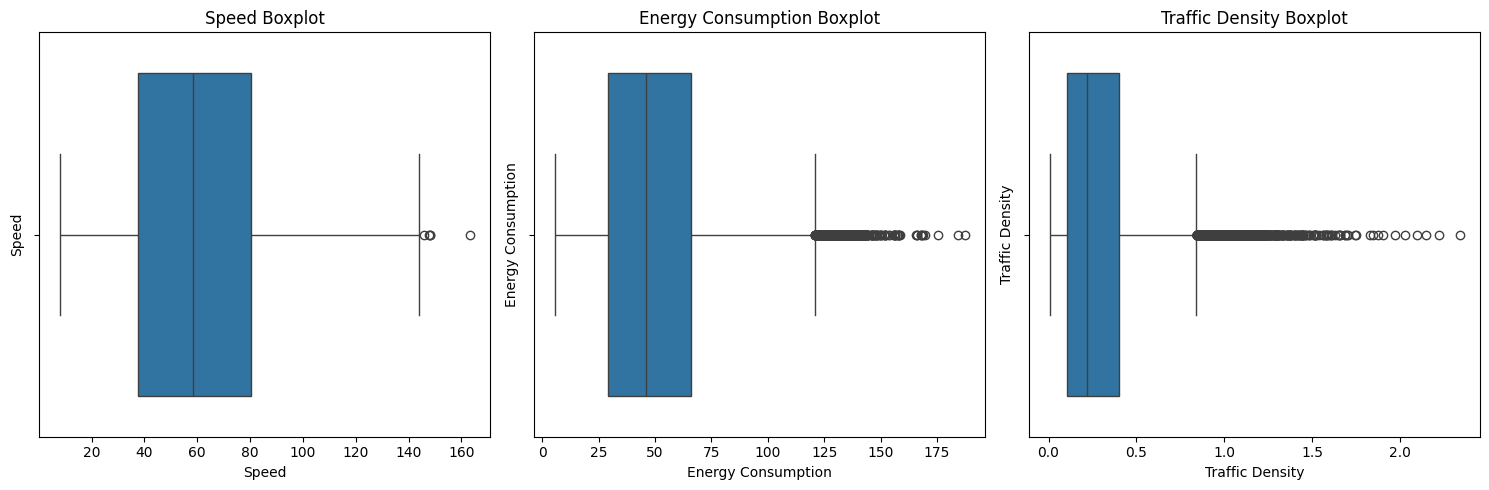

time: 1 s (started: 2024-04-13 14:43:16 +00:00)


In [23]:
# Create a figure and axes with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot box plots for Speed, Energy Consumption, and Traffic Density
sns.boxplot(x='Speed', data=df_noncat, ax=axes[0])
axes[0].set_ylabel('Speed')
axes[0].set_title('Speed Boxplot')

sns.boxplot(x='Energy Consumption', data=df_noncat, ax=axes[1])
axes[1].set_ylabel('Energy Consumption')
axes[1].set_title('Energy Consumption Boxplot')

sns.boxplot(x='Traffic Density', data=df_noncat, ax=axes[2])
axes[2].set_ylabel('Traffic Density')
axes[2].set_title('Traffic Density Boxplot')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [24]:
#Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat[['Speed','Energy Consumption','Traffic Density','Is Peak Hour']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=df_noncat.columns);
df_noncat_minmax_norm
# Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler

,Speed,Energy Consumption,Traffic Density,Is Peak Hour
0,0.138433,0.050169,0.221984,0.0
1,0.714521,0.759961,0.134693,0.0
2,0.595855,0.471845,0.014770,0.0
3,0.443795,0.222925,0.074710,1.0
4,0.240218,0.190525,0.192057,0.0
...,...,...,...,...
53896,0.244115,0.210661,0.202362,0.0
53897,0.198262,0.173164,0.015157,0.0
53898,0.533662,0.368999,0.246458,0.0
53899,0.341252,0.453133,0.082181,0.0


time: 55 ms (started: 2024-04-13 14:43:17 +00:00)


In [25]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_oe.copy();
df_cat_ppd # Preferred Data Subset

,index,cluster_number,City,Weather,Economic Condition,Day Of Week,Vehicle Type
0,0.0,2.0,4.0,3.0,2.0,3.0,2.0
1,1.0,1.0,0.0,4.0,1.0,6.0,3.0
2,2.0,1.0,3.0,4.0,1.0,6.0,0.0
3,3.0,0.0,1.0,0.0,0.0,4.0,2.0
4,4.0,2.0,0.0,4.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...
53896,53896.0,2.0,2.0,3.0,0.0,0.0,0.0
53897,53897.0,0.0,3.0,1.0,1.0,5.0,0.0
53898,53898.0,1.0,0.0,4.0,0.0,2.0,0.0
53899,53899.0,1.0,2.0,4.0,1.0,2.0,0.0


time: 57.2 ms (started: 2024-04-13 14:43:17 +00:00)


In [26]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_minmax_norm.copy();
df_noncat_ppd # Preferred Data Subset

,Speed,Energy Consumption,Traffic Density,Is Peak Hour
0,0.138433,0.050169,0.221984,0.0
1,0.714521,0.759961,0.134693,0.0
2,0.595855,0.471845,0.014770,0.0
3,0.443795,0.222925,0.074710,1.0
4,0.240218,0.190525,0.192057,0.0
...,...,...,...,...
53896,0.244115,0.210661,0.202362,0.0
53897,0.198262,0.173164,0.015157,0.0
53898,0.533662,0.368999,0.246458,0.0
53899,0.341252,0.453133,0.082181,0.0


time: 38 ms (started: 2024-04-13 14:43:17 +00:00)


###**Pre-Processed Dataset**

In [27]:
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd);
df_ppd # Pre-Processed Dataset

,index,cluster_number,City,Weather,Economic Condition,Day Of Week,Vehicle Type,Speed,Energy Consumption,Traffic Density,Is Peak Hour
0,0.0,2.0,4.0,3.0,2.0,3.0,2.0,0.138433,0.050169,0.221984,0.0
1,1.0,1.0,0.0,4.0,1.0,6.0,3.0,0.714521,0.759961,0.134693,0.0
2,2.0,1.0,3.0,4.0,1.0,6.0,0.0,0.595855,0.471845,0.014770,0.0
3,3.0,0.0,1.0,0.0,0.0,4.0,2.0,0.443795,0.222925,0.074710,1.0
4,4.0,2.0,0.0,4.0,2.0,2.0,0.0,0.240218,0.190525,0.192057,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53896,53896.0,2.0,2.0,3.0,0.0,0.0,0.0,0.244115,0.210661,0.202362,0.0
53897,53897.0,0.0,3.0,1.0,1.0,5.0,0.0,0.198262,0.173164,0.015157,0.0
53898,53898.0,1.0,0.0,4.0,0.0,2.0,0.0,0.533662,0.368999,0.246458,0.0
53899,53899.0,1.0,2.0,4.0,1.0,2.0,0.0,0.341252,0.453133,0.082181,0.0


time: 82.2 ms (started: 2024-04-13 14:43:17 +00:00)


In [28]:
df1 = df_ppd.copy();
df1

,index,cluster_number,City,Weather,Economic Condition,Day Of Week,Vehicle Type,Speed,Energy Consumption,Traffic Density,Is Peak Hour
0,0.0,2.0,4.0,3.0,2.0,3.0,2.0,0.138433,0.050169,0.221984,0.0
1,1.0,1.0,0.0,4.0,1.0,6.0,3.0,0.714521,0.759961,0.134693,0.0
2,2.0,1.0,3.0,4.0,1.0,6.0,0.0,0.595855,0.471845,0.014770,0.0
3,3.0,0.0,1.0,0.0,0.0,4.0,2.0,0.443795,0.222925,0.074710,1.0
4,4.0,2.0,0.0,4.0,2.0,2.0,0.0,0.240218,0.190525,0.192057,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53896,53896.0,2.0,2.0,3.0,0.0,0.0,0.0,0.244115,0.210661,0.202362,0.0
53897,53897.0,0.0,3.0,1.0,1.0,5.0,0.0,0.198262,0.173164,0.015157,0.0
53898,53898.0,1.0,0.0,4.0,0.0,2.0,0.0,0.533662,0.368999,0.246458,0.0
53899,53899.0,1.0,2.0,4.0,1.0,2.0,0.0,0.341252,0.453133,0.082181,0.0


time: 83.3 ms (started: 2024-04-13 14:43:17 +00:00)


In [29]:
df1.columns

Index(['index', 'cluster_number', 'City', 'Weather', 'Economic Condition',
       'Day Of Week', 'Vehicle Type', 'Speed', 'Energy Consumption',
       'Traffic Density', 'Is Peak Hour'],
      dtype='object')

time: 4.1 ms (started: 2024-04-13 14:43:17 +00:00)


###**Decision Tree**

In [30]:
df1_inputs = df1[['index', 'cluster_number', 'City', 'Weather', 'Economic Condition',
       'Day Of Week', 'Vehicle Type', 'Speed', 'Energy Consumption',
       'Traffic Density']];
df1_inputs

df1_output = df1[['Is Peak Hour']];
df1_output

df1_inputs_names = df1_inputs.columns;
df1_inputs_names
df1_output_labels = df1_output['Is Peak Hour'].unique().astype(str);
df1_output_labels

array(['0.0', '1.0'], dtype='<U32')

time: 8.83 ms (started: 2024-04-13 14:43:17 +00:00)


In [31]:
# Initialize StratifiedShuffleSplit with desired test size and random state
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45040)

# Perform the stratified split to get training and testing indices
for train_index, test_index in stratified_split.split(df1_inputs, df1_output):
    df1_inputs_train, df1_inputs_test = df1_inputs.iloc[train_index], df1_inputs.iloc[test_index]
    df1_output_train, df1_output_test = df1_output.iloc[train_index], df1_output.iloc[test_index]


time: 253 ms (started: 2024-04-13 14:43:17 +00:00)


In [56]:
# Decision Tree : Model (Training Subset)
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
dtc = DecisionTreeClassifier(criterion='gini', random_state=45035, max_depth=3) # Other Criteria : Entropy,  Log Loss
dtc_model = dtc.fit(df1_inputs_train, df1_output_train); dtc_model

DecisionTreeClassifier(max_depth=3, random_state=45035)

time: 223 ms (started: 2024-04-13 15:21:14 +00:00)


In [55]:
# Decision Tree : Model Rules
dtc_model_rules = export_text(dtc_model, feature_names = list(df1_inputs_names)); print(dtc_model_rules)

|--- Speed <= 0.72
|   |--- Energy Consumption <= 0.46
|   |   |--- Speed <= 0.65
|   |   |   |--- class: 0.0
|   |   |--- Speed >  0.65
|   |   |   |--- class: 0.0
|   |--- Energy Consumption >  0.46
|   |   |--- Speed <= 0.51
|   |   |   |--- class: 0.0
|   |   |--- Speed >  0.51
|   |   |   |--- class: 0.0
|--- Speed >  0.72
|   |--- Energy Consumption <= 0.52
|   |   |--- Traffic Density <= 0.29
|   |   |   |--- class: 1.0
|   |   |--- Traffic Density >  0.29
|   |   |   |--- class: 0.0
|   |--- Energy Consumption >  0.52
|   |   |--- Speed <= 0.80
|   |   |   |--- class: 0.0
|   |   |--- Speed >  0.80
|   |   |   |--- class: 1.0

time: 2.18 ms (started: 2024-04-13 15:21:06 +00:00)


In [57]:
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'feature': df1_inputs_names, 'importance': np.round(dtc_model.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

,feature,importance
7,Speed,0.734
8,Energy Consumption,0.242
9,Traffic Density,0.024
0,index,0.000
1,cluster_number,0.000
2,City,0.000
3,Weather,0.000
4,Economic Condition,0.000
5,Day Of Week,0.000
6,Vehicle Type,0.000


time: 23.8 ms (started: 2024-04-13 15:21:23 +00:00)


In [58]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict = dtc_model.predict(df1_inputs_train); dtc_model_predict

array([0., 0., 0., ..., 0., 0., 0.])

time: 25.5 ms (started: 2024-04-13 15:21:26 +00:00)


In [59]:
# Decision Tree : Prediction (Testing Subset)
dtc_predict = dtc_model.predict(df1_inputs_test); dtc_predict

array([0., 0., 0., ..., 0., 0., 0.])

time: 27.9 ms (started: 2024-04-13 15:21:28 +00:00)


In [60]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat = pd.DataFrame(confusion_matrix(df1_output_train, dtc_model_predict)); dtc_model_conf_mat
dtc_model_perf = classification_report(df1_output_train, dtc_model_predict); print(dtc_model_perf)

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     36387
         1.0       0.86      0.02      0.04      6733

    accuracy                           0.85     43120
   macro avg       0.85      0.51      0.48     43120
weighted avg       0.85      0.85      0.78     43120

time: 231 ms (started: 2024-04-13 15:21:30 +00:00)


In [61]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(df1_output_test, dtc_predict)); dtc_predict_conf_mat
dtc_predict_perf = classification_report(df1_output_test, dtc_predict); print(dtc_predict_perf)

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      9098
         1.0       0.76      0.02      0.04      1683

    accuracy                           0.85     10781
   macro avg       0.80      0.51      0.48     10781
weighted avg       0.83      0.85      0.78     10781

time: 181 ms (started: 2024-04-13 15:21:33 +00:00)


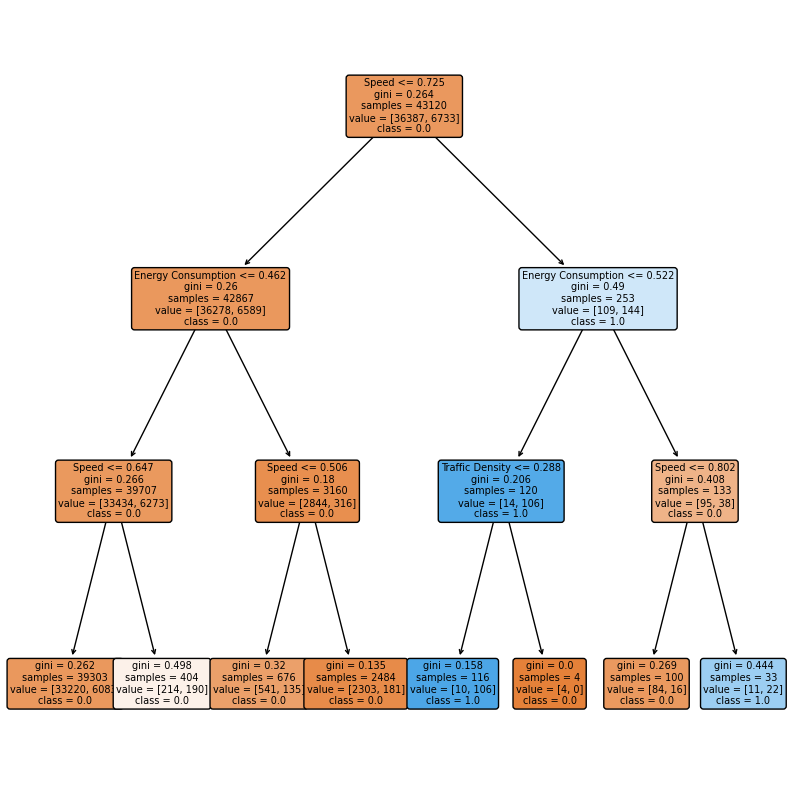

time: 1.35 s (started: 2024-04-13 15:21:36 +00:00)


In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set a larger figure size for better clarity
plt.figure(figsize=(10, 10))

# Plot the decision tree
train_subset_dtc_plot = plot_tree(dtc_model, feature_names=df1_inputs_names, class_names=df1_output_labels, rounded=True, filled=True, fontsize=7)

# Show the plot
plt.show()

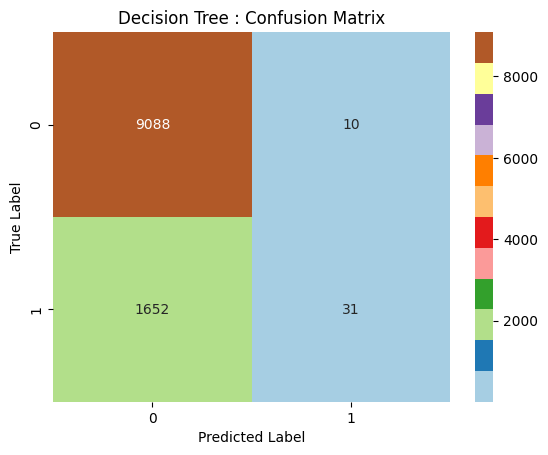

time: 430 ms (started: 2024-04-13 15:21:41 +00:00)


In [63]:
# Set up the plot
ax = plt.axes()

# Plot the confusion matrix with annotations in integer format
sns.heatmap(dtc_predict_conf_mat, annot=True, fmt='d', cmap='Paired')

# Set labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')

# Show the plot
plt.show()


In [64]:
# Define your decision tree classifier with desired parameters
dtc_cv = DecisionTreeClassifier(criterion='gini', random_state=45007)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dtc_cv, df1_inputs, df1_output.values.ravel(), cv=20)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.8060089  0.84341373 0.85083488 0.84935065 0.85565863 0.86122449
 0.87458256 0.86307978 0.86530612 0.85565863 0.85454545 0.86048237
 0.86419295 0.86567718 0.85899814 0.8619666  0.84378479 0.85343228
 0.85120594 0.16252319]
Average Cross-Validation Score: 0.8200963634712046
time: 22.2 s (started: 2024-04-13 15:21:46 +00:00)


In [42]:
# Compute F1 score
f1 = f1_score(df1_output_test, dtc_predict, average='macro')  # or 'weighted' for weighted F1 score
print("F1 Score:", f1)

# Weighted F1 score
weighted_f1 = f1_score(df1_output_test, dtc_predict, average='weighted')
print("Weighted F1 Score:", weighted_f1)


F1 Score: 0.47609213515788795
Weighted F1 Score: 0.7788060252438804
time: 45.6 ms (started: 2024-04-13 14:43:42 +00:00)


###**Random Forest**

In [76]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=45035)

time: 736 µs (started: 2024-04-13 15:36:52 +00:00)


In [77]:
rf_classifier.fit(df1_inputs_train, df1_output_train['Is Peak Hour'])

RandomForestClassifier(random_state=45035)

time: 19.7 s (started: 2024-04-13 15:36:54 +00:00)


In [78]:
y_train_pred_rf = rf_classifier.predict(df1_inputs_train)
y_test_pred_rf = rf_classifier.predict(df1_inputs_test)

time: 1.32 s (started: 2024-04-13 15:37:17 +00:00)


In [79]:
# Train the Random Forest classifier
rf_classifier.fit(df1_inputs_train, df1_output_train['Is Peak Hour'])

# Print feature importances
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df1_inputs_train.columns, 'Importance': feature_importances})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(sorted_feature_importance_df)


Feature Importances:
              Feature  Importance
7               Speed    0.246562
8  Energy Consumption    0.222645
9     Traffic Density    0.159133
0               index    0.149812
2                City    0.064167
3             Weather    0.046531
5         Day Of Week    0.040421
6        Vehicle Type    0.036479
4  Economic Condition    0.025372
1      cluster_number    0.008879
time: 12.6 s (started: 2024-04-13 15:37:20 +00:00)


In [80]:
# For training set
print("Training Set Confusion Matrix:")
print(confusion_matrix(df1_output_train['Is Peak Hour'], y_train_pred_rf))

print("\nTraining Set Classification Report:")
print(classification_report(df1_output_train['Is Peak Hour'], y_train_pred_rf))

Training Set Confusion Matrix:
[[36387     0]
 [    0  6733]]

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     36387
         1.0       1.00      1.00      1.00      6733

    accuracy                           1.00     43120
   macro avg       1.00      1.00      1.00     43120
weighted avg       1.00      1.00      1.00     43120

time: 141 ms (started: 2024-04-13 15:37:36 +00:00)


In [81]:
# For testing set
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(df1_output_test['Is Peak Hour'], y_test_pred_rf))

print("\nTesting Set Classification Report:")
print(classification_report(df1_output_test['Is Peak Hour'], y_test_pred_rf))


Testing Set Confusion Matrix:
[[9077   21]
 [1294  389]]

Testing Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      9098
         1.0       0.95      0.23      0.37      1683

    accuracy                           0.88     10781
   macro avg       0.91      0.61      0.65     10781
weighted avg       0.89      0.88      0.84     10781

time: 42.6 ms (started: 2024-04-13 15:37:40 +00:00)


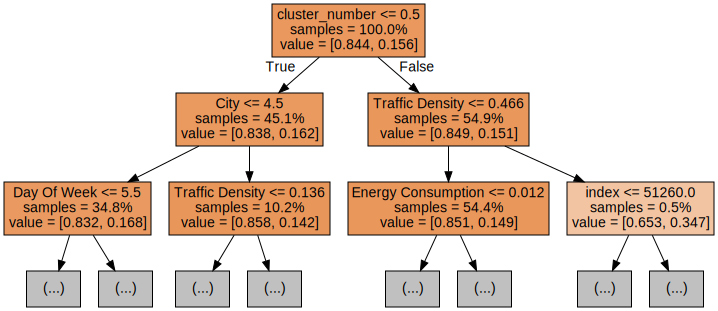

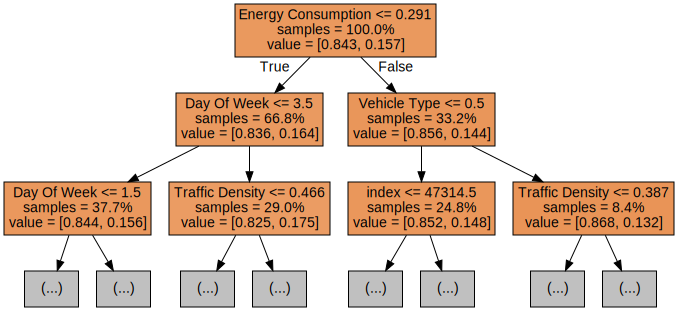

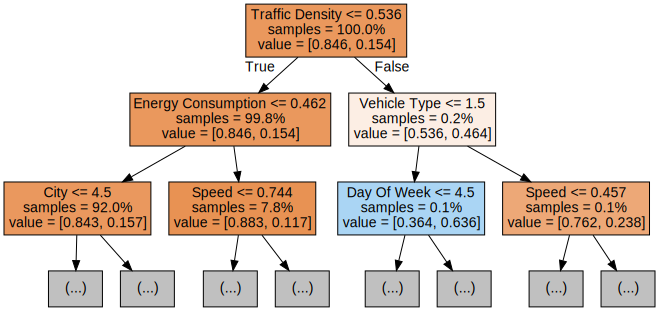

time: 79.8 ms (started: 2024-04-13 15:37:43 +00:00)


In [82]:
# Assuming rf is your trained Random Forest classifier
for i in range(3):
    tree = rf_classifier.estimators_[i]  # Assuming rf_classifier is your trained Random Forest model
    dot_data = export_graphviz(tree,
                               feature_names=df1_inputs_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [83]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_classifier, df1_inputs_train, df1_output_train['Is Peak Hour'], cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.87488404 0.87256494 0.87662338 0.87407236 0.87755102]
Mean CV Score: 0.8751391465677181
time: 48.5 s (started: 2024-04-13 15:37:48 +00:00)


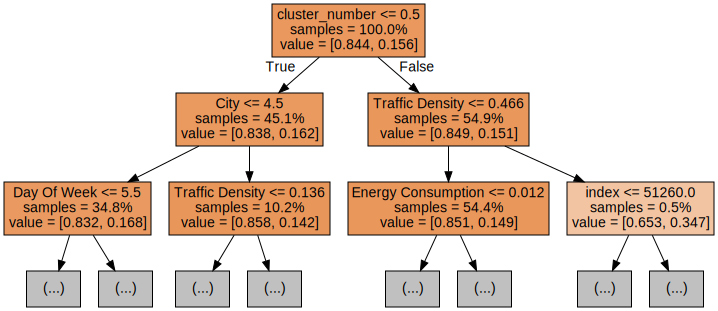

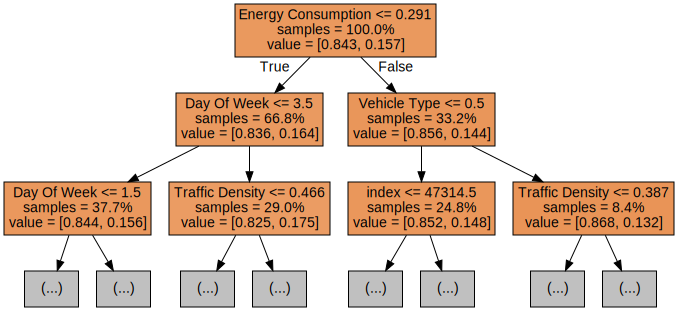

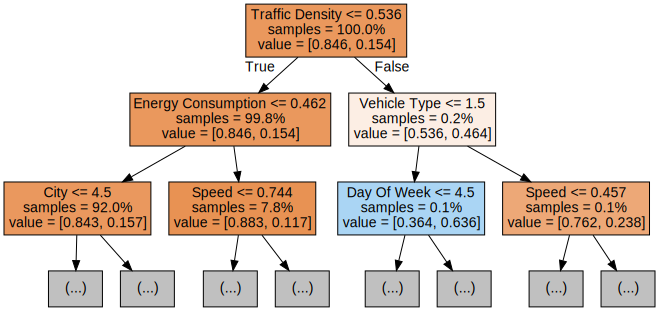

time: 107 ms (started: 2024-04-13 15:38:37 +00:00)


In [84]:
# Export and visualize the first three decision trees
for i in range(3):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=df1_inputs_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [85]:
# Initialize a dictionary to store tree frequencies and rules
tree_frequency = Counter()
tree_rules = {}

# Loop through the trees and count their frequency while storing rules
for i in range(len(rf_classifier.estimators_)):
    tree = rf_classifier.estimators_[i]
    tree_str = export_text(tree, feature_names=list(df1_inputs_train.columns))
    tree_frequency[tree_str] += 1
    tree_rules[tree_str] = tree

# Get the three most frequent trees
top_trees = tree_frequency.most_common(3)

# Print the rules for the top three trees
for tree_str, frequency in top_trees:
    print(f"Tree Frequency: {frequency}")
    print(tree_str)
    print("\n")

Tree Frequency: 1
|--- cluster_number <= 0.50
|   |--- City <= 4.50
|   |   |--- Day Of Week <= 5.50
|   |   |   |--- Traffic Density <= 0.04
|   |   |   |   |--- index <= 53882.50
|   |   |   |   |   |--- Energy Consumption <= 0.22
|   |   |   |   |   |   |--- Traffic Density <= 0.04
|   |   |   |   |   |   |   |--- City <= 3.50
|   |   |   |   |   |   |   |   |--- Traffic Density <= 0.04
|   |   |   |   |   |   |   |   |   |--- Energy Consumption <= 0.22
|   |   |   |   |   |   |   |   |   |   |--- Traffic Density <= 0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 23
|   |   |   |   |   |   |   |   |   |   |--- Traffic Density >  0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- Energy Consumption >  0.22
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Traffic Density >  0.04
|   |   |   |   |   |   |   |   |   |--- City <= 0.50
|   |  

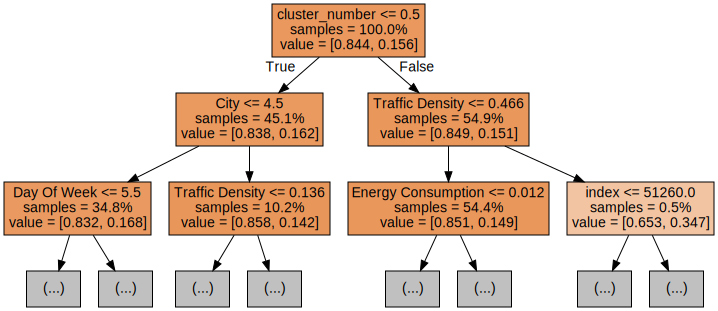

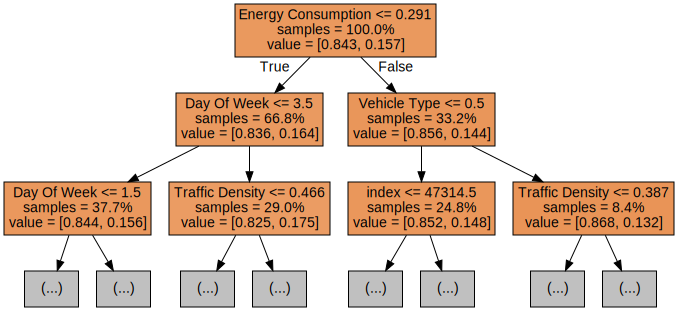

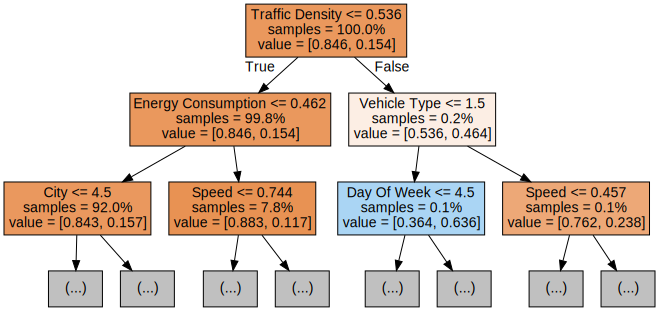

time: 203 ms (started: 2024-04-13 15:38:52 +00:00)


In [86]:
# Initialize a dictionary to store tree frequencies
tree_frequency = Counter()

# Loop through the trees and count their frequency
for i in range(len(rf_classifier.estimators_)):
    tree = rf_classifier.estimators_[i]
    tree_str = export_graphviz(tree, feature_names=df1_inputs_train.columns,
                               filled=True, max_depth=2, impurity=False, proportion=True)
    tree_frequency[tree_str] += 1

# Get the three most frequent trees
top_trees = tree_frequency.most_common(3)

# Plot the top three trees
for tree_str, frequency in top_trees:
    graph = graphviz.Source(tree_str)
    display(graph)

# XG Boost

In [87]:
dtrain = xgb.DMatrix(df1_inputs_train, label=df1_output_train['Is Peak Hour'])
dtest = xgb.DMatrix(df1_inputs_test, label=df1_output_test['Is Peak Hour'])

time: 177 ms (started: 2024-04-13 15:54:40 +00:00)


In [89]:
# Define XGBoost parameters
params = {
    'objective': 'multi:softmax',  # For multi-class classification
    'num_class': len(df1_output_train['Is Peak Hour'].unique()),  # Number of unique classes in the output
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'eval_metric': 'merror'  # Use 'merror' for multiclass classification error
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(**params)

# Train the classifier
xgb_classifier.fit(df1_inputs_train, df1_output_train['Is Peak Hour'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_class=2, num_parallel_tree=None, ...)

time: 18.9 s (started: 2024-04-13 15:54:52 +00:00)


In [90]:
# Print feature importances
feature_importances = xgb_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df1_inputs_train.columns, 'Importance': feature_importances})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(sorted_feature_importance_df)

              Feature  Importance
6        Vehicle Type    0.186136
2                City    0.166515
7               Speed    0.157805
8  Energy Consumption    0.146886
9     Traffic Density    0.065747
1      cluster_number    0.064882
5         Day Of Week    0.056091
3             Weather    0.054770
4  Economic Condition    0.051470
0               index    0.049697
time: 13.2 ms (started: 2024-04-13 15:55:26 +00:00)


In [92]:
# Make predictions on the training set
y_train_pred = xgb_classifier.predict(df1_inputs_train)

# Print classification report for training set
print("Training Set Classification Report:")
print(classification_report(df1_output_train['Is Peak Hour'], y_train_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     36387
         1.0       0.99      0.63      0.77      6733

    accuracy                           0.94     43120
   macro avg       0.96      0.81      0.87     43120
weighted avg       0.94      0.94      0.94     43120

time: 3.26 s (started: 2024-04-13 15:55:52 +00:00)


In [93]:
# Print confusion matrix for training set
print("Training Set Confusion Matrix:")
print(confusion_matrix(df1_output_train['Is Peak Hour'], y_train_pred))

Training Set Confusion Matrix:
[[36344    43]
 [ 2491  4242]]
time: 106 ms (started: 2024-04-13 15:56:03 +00:00)


In [94]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(df1_inputs_test)

# Evaluate the model
print(classification_report(df1_output_test['Is Peak Hour'], y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      9098
         1.0       0.90      0.47      0.61      1683

    accuracy                           0.91     10781
   macro avg       0.90      0.73      0.78     10781
weighted avg       0.91      0.91      0.90     10781

time: 608 ms (started: 2024-04-13 15:56:08 +00:00)


In [95]:
# Make predictions on the test set
y_test_pred = xgb_classifier.predict(df1_inputs_test)

# Print confusion matrix for testing set
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(df1_output_test['Is Peak Hour'], y_test_pred))


Testing Set Confusion Matrix:
[[9008   90]
 [ 897  786]]
time: 1.32 s (started: 2024-04-13 15:56:18 +00:00)


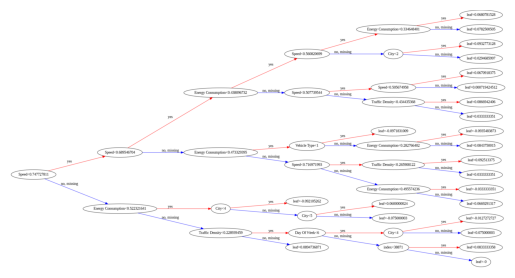

time: 1.46 s (started: 2024-04-13 15:56:27 +00:00)


In [96]:
# Plot the first tree in the XGBoost model
xgb.plot_tree(xgb_classifier, num_trees=0, rankdir='LR')  # num_trees=0 plots the first tree
plt.rcParams['figure.figsize'] = [300, 500]  # Adjust the figure size if needed
plt.show()



---



# **PART-B (PROJECT REPORT)**:

# **Project Title -:**

# **Optimizing Urban Traffic Flow through Supervised Machine Learning > Cross Validation | Ensemble Methods > | Random Forest | XGBoost**

####**"Analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption."**


**This Project consists of broadly 5 sections-:**

**1. Project Objectives | Problem Statements**

**2. Description of Data**

**3. Analysis of Data**

**4. Results | Observations**

**5. Managerial Insights**




---



# **Section-01 (Objectives / Problem Statements)**

##**Overall Goal:**
•	Segment, cluster, or classify traffic data using supervised learning algorithms.

##**Specific Objectives:**
1.	**Classification of Traffic Data:** This objective focuses on using supervised learning algorithms to categorize traffic data into predefined groups. These groups could represent different types of traffic (e.g., commuter traffic, commercial traffic), traffic flow patterns (e.g., congestion, free-flowing), or other relevant categories based on your project's specific needs.
2.**Model Selection:** This objective aims to identify the most suitable supervised learning model for your traffic data classification task. You'll be evaluating models like Random Forest and XGBoost (along with potentially others) using cross-validation techniques to determine the model with the best performance on unseen data.
3.	**Feature Importance and Thresholds:** This objective focuses on understanding which features in your traffic data (e.g., speed, volume, time of day) contribute most significantly to the classification process. You'll also be interested in identifying any potential thresholds within these features that might help distinguish between different traffic classes.

**Additional Considerations:**

**•	Data Preprocessing:** While not explicitly mentioned in the objectives, data preprocessing is a crucial step before applying supervised learning algorithms. This might involve cleaning, transforming, and handling missing values in your traffic data.

**•	Evaluation Metrics:** Defining appropriate evaluation metrics (e.g., accuracy, precision, recall) is necessary to assess the performance of your chosen classification models.




---



# **Section-02 (Data Description & Statistics)**

###**1.) Dataset Overview-**

This dataset provides a detailed view of traffic data in a futuristic urban environment, containing over 50k records. Each record represents a unique snapshot of various factors affecting traffic conditions in six fictional cities.

###**Size of Data-:** 4.56 MB

###**Shape of the Data-:** 53901 rows × 13 columns

###**Features / Variables-:**
**1.) City:** Name of the city (e.g., MetropolisX, SolarisVille).

**2) Vehicle ype:** Type of vehicle (e.g., Car, Flying Car).

**3.) Weather Conditions:** Current weather (e.g., Clear, Rainy).

**4.) Economic Conditions:** Economic state of the city (e.g., Booming, Recession).

**5.) Day of Week:** Day of the week.

**6.) Hour of Day:** Hour of the day when the data was recorded. Speed: Recorded vehicle speed.

**7.) Energy Consumption:** Estimated energy consumption based on vehicle type and speed.

**8.) Is Peak Hour:** Indicator if the record was during peak traffic hours.

**9.) Random Event Occurred:** Indicator if a random event (e.g., accidents, road closures) occurred.

**10.) Traffic Density:** Density of traffic at the time of recording.

**11.) Index:** Alloting serial number to every row

**12.) Cluster Number:** This variable is representing the 3 cluster formed based on SS and David Score.


###**2.) Source of Data -:** https://www.kaggle.com/datasets/tanishqdublish/urban-traffic-density-in-cities

The dataset is provided in CSV format, suitable for analysis in various data processing tools and programming languages.

####**Potential Uses -:**
This dataset can be utilized for a variety of studies and analyses, including: Understanding traffic patterns in futuristic urban environments. Analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption. Developing and testing traffic management algorithms, especially for autonomous vehicles and smart city solutions.


###**3.) Variable Description -:**

####**a.) Identification & Bifurcation of Variables into Categorical and Non-Categorical**

We have identified some of the significant Categorical & Non-Categorical Varibales in the Data Set.

**Categorical Variables-:**

**1.) City:** Name of the city (e.g., MetropolisX, SolarisVille).

**2.) Vehicle Type:** Type of vehicle (e.g., Car, Flying Car).

**3.) Weather Conditions:** Current weather (e.g., Clear, Rainy).

**4.) Economic Conditions:** Economic state of the city (e.g., Booming, Recession).

**5.) Day of Week**: Day of the week.

**Non-Categorical Varibales-:**

**1.) Energy Consumption:** Estimated energy consumption based on vehicle type and speed.

**2.) Traffic Density:** Density of traffic at the time of recording.

**Output Variable-:**

**Is Peak Hour:** 0 =  This is an output variable or decision making variable.

     0 = No peak hour

     1= yes peak hour


####**b.) Descriptive Statistics of Categorical Variables**

**1) City-:**
a.) All the six cities mentioned in the pie chart (SolarisVille, Ecoopolis, TechHaven, Neuroburg, MetropolisX and AquaCity) have a nearly equal share of the whole pie chart.

b.) AquaCity has the biggest share (16.94%) compared to all the other cities.

**2.) Weather-:**

a.) The weather conditions are fairly evenly distributed, with no single type of weather dominating a significant portion of the pie chart.

b.) Electromagnetic Storm, Rainy, and Snowy weather each occupy a slice that is around 20% of the pie chart.

**3.) Economic Conditons-:**

a.) Pie charts are not ideal for showing trends over time.

b.) The data used to create the pie chart may not be current.

**4.) Day OF Week-:**

a.) The distribution of pie sales is relatively consistent across the week. There is no single day that sees a significantly higher or lower volume of pie sales compared to the others.

b.) Tuesdays have the highest percentage of pies sold (14.38%), while Sundays have the lowest (14.13%). However the difference is small (only 0.25%).

**5.) Vehicle Type-:**

a.) Autonomous vehicles are the dominant mode of transport, accounting for over 60% of the total.

b.) Flying cars are a more common mode of transport than traditional cars in this dataset.


####**c.) Descriptive Statistics of Non-Categorical Variables**

**1.) Speed**

Mean of Speed is = 59.95

St. Dev. of Speed is = 26.57

a.) The median speed is around 60.

b.) There is a spread of data in the center of the box, indicating some variation in speeds around the median.

c.) The whiskers are relatively short, which means that most of the data is clustered around the median.

d.) There are a few outliers at the higher end of the speed range.


**2.) Energy Consumption**

Mean of Energy Consumption is = 59.95

St. Dev. of Energy Consumption is = 59.95

a) Center tendency: The median speed is most likely around 75, as this value falls in the middle of the box. This means that half of the speeds are higher than 75 and the other half are lower.

b.) Distribution of speeds: The box in the center of the plot is relatively short, indicating that the middle 50% of the data points are clustered together. There is likely not a significant variation in speeds within this central group.

c.) Variability: The whiskers extend further upwards compared to downwards, indicating that there may be more data points with speeds higher than 75 than there are with speeds lower than 75. There are also a few outliers at the higher end of the speed range, which are data points that differ significantly from the majority.


**3.) Traffic Density**

Mean of Traffic Density is = 59.95

St. Dev. of Traffic Density is = 26.57

a.) Center tendency: The median traffic density is likely around 0.75 vehicles/km (vehicles per kilometer). This means that half of the measured traffic densities are higher than 0.75 vehicles/km and the other half are lower.

b.) Distribution of traffic density: The size of the box indicates the spread of traffic densities in the middle 50% of the data. A relatively small box, like the one in this image, suggests that there is not a large variation in traffic densities within this central group.

c.) Variability: The whiskers are short, which means that most of the data points are clustered around the median. There are a few outliers on the lower end, indicated by the individual dots below the whiskers. This suggests that there were a few instances where the traffic density was much lower than the typical values.




---



# **Section-03 (Data Analysis)**

###**1.) Data Pre-Processing**

**a.) Missing Data Information**

**Variable-wise:** There are zero missing values for any of the columns. This means all columns have data for all 53,901 entries.

**Record-wise:**
Looking at the top 50,000 entries (record-wise missing data information), there are also zero missing values. This suggests there likely aren't any missing values in the entire dataset (all 53,901 entries).

**Inferences:**
This dataset seems to be well-maintained with no missing data points across the 11 columns and 53,901 entries (at least for the top 50,000 entries checked). You can proceed with your analysis on this complete dataset with confidence that all information is available.


**b.) Ordinal Encoding (Superior)**

**Definition-:** Ordinal encoding is a technique used to convert categorical data into numerical data, where the numerical values represent the order or rank of the categories.

**There are two main reasons why ordinal encoding is used:**

**Machine Learning Compatibility:** Many machine learning algorithms can't directly work with categorical data. Ordinal encoding converts these categories into numerical values that machine learning models can understand and use for calculations.

**Preserving Order:** When the order between categories is meaningful, ordinal encoding is a better choice than other methods like one-hot encoding. One-hot encoding simply converts each category into a separate binary feature, losing the inherent order between them.

•	Columns: The data likely has at least six categorical columns based on the headers: City, Weather, Economic Condition, Day of Week, and Vehicle Type.

•	New Values: The categorical data has been replaced with numerical values. For instance, "City" with a value of "4.0" might correspond to a specific city name like "Los Angeles" in the original data.

•	Encoding Scheme: Without the original data, it's difficult to determine the exact encoding scheme used. However, it's likely that the encoder assigned numerical values starting from 0 (e.g., 0, 1, 2, ...) to represent the order of the categories within each column. For example, "Weather" with a value "3.0" might correspond to "Rainy" if "Rainy" appeared after "Sunny" and "Cloudy" in the original data.

**Inferences:**

•	Ordinal encoding has been used on this data, likely because the categorical variables have a natural order or ranking. For instance, economic conditions might be classified as "Stable" (1), "Recession" (2), and "Booming" (3), where the numbers reflect increasing economic activity.

•	This encoding can be useful for machine learning algorithms that work better with numerical data.

**Limitations:**

•	The inference about the order of the categories (e.g., City 4.0 corresponds to Los Angeles) is an assumption based on typical ordinal encoding schemes. Without the original data, it's difficult to be certain about the specific mapping between categories and numbers.

•	Ordinal encoding assumes a meaningful order exists between the categories. If the categorical variables don't have a natural order (e.g., favorite color), ordinal encoding might not be the most appropriate technique.


**c.) Data Transformation & Rescaling [Treatment of Outliers]**

Data transformation and rescaling are techniques used in data preprocessing to prepare data for analysis. They can improve the performance of machine learning algorithms and make data visualizations more interpretable.

**1. Data Transformation:**

Data transformation involves modifying the format or characteristics of your data to make it suitable for analysis. Here are some common types of data transformation:

•	Normalization: This technique scales numerical features to a specific range, often between 0 and 1 or -1 and 1. This can be helpful when working with features that have different units or scales.

•	Standardization: Similar to normalization, standardization scales features to have a mean of 0 and a standard deviation of 1. This can be useful when features have different scales and the distribution is approximately normal.

•	Log transformation: This transformation is applied to features with a skewed distribution (lopsided towards one side). Taking the logarithm can often make the distribution more symmetrical.

•	Encoding categorical features: Categorical features (like "color" or "city") need to be converted into numerical values before feeding them into machine learning algorithms. Techniques like one-hot encoding or ordinal encoding can be used for this purpose.

**2. Rescaling:**

Rescaling is a specific type of data transformation that focuses on changing the scale of the data. This can be done using techniques like normalization or standardization mentioned above. Rescaling is particularly useful when you have features with significantly different ranges. Here's why it's important:

•	Distance-based algorithms: Many machine learning algorithms rely on calculating distances between data points. If features have vastly different scales, features with larger scales will dominate the distance calculations, even if they are not very informative. Rescaling ensures all features contribute equally.

•	Standardization and Normalization: These techniques are specific rescaling methods that can improve the stability and convergence of some machine learning algorithms (especially those based on gradient descent optimization).

**3. Treatment of Outliers:**

Outliers are data points that fall significantly outside the overall pattern of the data. They can occur due to errors, measurement issues, or natural variations in the data. Outliers can have a negative impact on data analysis and machine learning models.

•	Identifying outliers: Techniques like boxplots, z-scores, or interquartile range (IQR) can be used to identify potential outliers.

•	Winsorization: This technique replaces outliers with values at the upper or lower limits of a specific percentile range (e.g., replacing outliers with values at the 1st and 99th percentiles).

•	Capping: This technique simply sets a maximum or minimum value for outliers, effectively capping their influence.

•	Removing outliers: In some cases, outliers might be genuine errors or irrelevant to your analysis. You can choose to remove them, but do so with caution and justification.

**Why do we do data transformation and rescaling?**

There are several reasons why data transformation and rescaling are important:

•	Improved model performance: By transforming and rescaling data, you can create a more level playing field for features, allowing machine learning algorithms to learn more effectively and potentially leading to better model performance.

•	Enhanced interpretability: Rescaling features to a common range can make data visualizations like scatter plots or parallel coordinates easier to interpret.

•	Algorithm stability: Normalization and standardization can improve the stability and convergence of some machine learning algorithms, especially those that rely on gradient descent optimization.

•	Handling outliers: Outlier treatment helps prevent outliers from unduly influencing the analysis or model.


##**2.) Analysis**

###**Decision Tree**

The tree appears to classify traffic flow into peak hours (indicated by "1") and non-peak hours (indicated by "0") based on a series of conditions (splits) on different features. Here's a simplified breakdown of the decision process, starting from the root node:

**•	Economic Condition:**

o	If the "Economic Condition" is "Booming", the data is directed to the left branch.

o	If it's not "Booming" (which likely includes "Recession" or "Stable"), the data goes to the right branch.

**•	Left Branch (Booming Economy):**

o	The next decision is based on "Traffic Density".

1. If "Traffic Density" is less than or equal to a certain threshold (around 0.75 vehicles/km based on the image), it's classified as "Not Peak Hour" (0).

2. If "Traffic Density" is greater than 0.75 vehicles/km, it's classified as "Peak Hour" (1).

**•	Right Branch (Not Booming Economy):**

o	The next split is based on "Day of Week".

1. If it's "Saturday" or "Sunday", it's classified as "Not Peak Hour" (0).
2. If it's not a weekend (weekdays), it's further directed to another decision, likely based on another feature (unclear from the image).


###**Confusion Matrix**
A confusion matrix is a table that visualizes the performance of a classification model. It shows the number of correct and incorrect predictions made by the model.

**Elements of the Matrix:**

•	Rows represent the actual (true) labels of the data samples.

•	Columns represent the labels predicted by the model.

•	Diagonal elements (bold in the image): These represent the correctly classified instances.

o	In this case, 7787 (predicted as 0 and actually 0) and 1453 (predicted as 1 and actually 1) were classified correctly.

**•	Off-diagonal elements:**

These represent the incorrectly classified instances.

o	Here, 1311 (actual 0 but predicted as 1) and 230 (actual 1 but predicted as 0) were classified incorrectly.


**Interpreting the Performance:**

**•	Accuracy:** It can be calculated by summing the correctly classified instances (diagonal elements) and dividing by the total number of instances. Here, the accuracy is:

Accuracy = (7787 + 1453) / (7787 + 1311 + 230 + 1453) = 0.85

**•	Precision:** For the predicted class "1" (Peak Hour), precision is the ratio of correctly predicted peak hours (1453) to the total instances predicted as peak hours (1453 + 1311). In this case, precision is:

Precision (Peak Hour) = 1453 / (1453 + 1311) = 0.52

**•	Recall:** For the actual class "1" (Peak Hour), recall is the ratio of correctly predicted peak hours (1453) to the total actual peak hours (1453 + 230). Here, recall is:

Recall (Peak Hour) = 1453 / (1453 + 230) = 0.86


**Observations from the Confusion Matrix:**

•	The model seems to have a higher accuracy (0.85) in classifying non-peak hours (0) compared to peak hours (1). This is evident from the larger number of correctly classified non-peak hours (7787) and the lower precision for peak hours (0.52).

•	The model tends to misclassify a significant number of actual peak hours (230) as non-peak hours. This could be due to the complexity of identifying factors leading to peak hours.


**5-fold cross-validation-**

**Cross-Validation:**

Cross-validation is a technique used to estimate the performance of a machine learning model on unseen data. It involves splitting the available data into multiple folds and training the model on a subset of folds (training set) while evaluating its performance on the remaining folds (validation set). This process is repeated multiple times with different folds used for training and validation.

**Output Interpretation:**

**•	Cross-Validation Scores:**

This line shows the individual scores obtained for each fold in the cross-validation process. In this case, you have 20 scores listed, ranging from 0.1625 (lowest) to 0.8745 (highest).

•	Average Cross-Validation Score: This line shows the average score across all the folds, which is 0.8201 in this case.

**Insights from the Scores:**

•	The individual fold scores show some variability, ranging from around 0.16 (very low) to 0.87 (high). This indicates that the model's performance can vary depending on the specific data used for training and validation in each fold.

•	However, the average cross-validation score of 0.82 suggests that the model generalizes reasonably well on unseen data. It achieves an accuracy of around 82% on average across different data splits.

**F1-Score:**

The F1-score is a metric used to evaluate the performance of a classification model. It combines the concepts of precision and recall into a single score, addressing the limitations of using just one of these metrics.

**•	F1 Score (0.476):**

This is the macro F1-score, indicating an overall average performance of the model across both classes (peak hour and non-peak hour) on the testing set. A score of 1 represents perfect balance between precision and recall, while 0 represents the worst performance.

**•	Weighted F1 Score (0.779):**

This is the weighted F1-score, which considers the class imbalance in your data. Here, non-peak hours likely have more instances compared to peak hours. The weighted F1-score prioritizes performance on the majority class (non-peak hours) while still accounting for the minority class (peak hours).

**Insights from the Scores:**

•	The macro F1-score (0.476) suggests a relatively low overall performance, indicating an imbalance between the model's ability to predict peak hours and non-peak hours accurately.

•	The weighted F1-score (0.779) is significantly higher, suggesting the model performs better on the majority class (non-peak hours) due to the class imbalance.


###**Random Forest**

Random Forest is a popular and powerful machine learning algorithm that falls under the category of ensemble learning.

**Ensemble of Decision Trees:**

•	At its heart, a Random Forest is a collection of individual decision trees. Each decision tree is a hierarchical structure that splits the data based on features (attributes) to make predictions.

•	The strength of Random Forest lies in its ensemble nature. By combining the predictions of many uncorrelated decision trees, the overall model becomes more robust and accurate than any single decision tree.

**Building the Forest:**

1.	Random Subsampling (Bootstrapping): When building the forest, a random selection (with replacement) of data points, called a bootstrap sample, is drawn from the training data. This creates multiple training sets with some data points appearing multiple times and others omitted entirely.

2.	Random Feature Selection: At each node of a decision tree within the forest, a random subset of features is chosen from the total set of features. This randomness helps prevent all trees from focusing on the same features and encourages diversity within the ensemble.

3.	Growing the Trees: Each decision tree in the forest is grown independently on its corresponding bootstrap sample. The tree splits the data based on the chosen features, aiming to minimize an impurity measure (like Gini index for classification) at each split. This process continues until a stopping criteria is met, like reaching a certain maximum depth or minimum number of data points per leaf node.

**Applications of Random Forest:**

•	Random Forests are widely used in various machine learning domains, including:

o	Classification: Spam detection, image recognition, customer churn prediction.

o	Regression: Predicting house prices, stock prices, customer lifetime value.

o	Feature selection: Identifying the most relevant features for a specific task.

In essence, Random Forest leverages the power of multiple decision trees, each with some randomness injected, to create a robust and accurate machine learning model.


**Cross-Validation and Mean CV Score:**

**•	Cross-Validation:**

This section performs 5-fold cross-validation on the training data. It splits the data into five folds, trains the model on four folds, and evaluates its performance on the remaining fold. This process is repeated five times, using each fold for evaluation once. This helps assess the model's generalizability to unseen data beyond the initial training set.

**•	Mean CV Score:**

The output shows the individual scores for each fold (around 0.87) and the mean CV score (0.875). This indicates that the model achieves an average accuracy of 87.5% across different data splits in the cross-validation process.

**Key Points:**

•	The random forest model achieves a good average performance based on cross-validation (mean CV score of 0.875).

•	However, the high training set accuracy and low peak hour recall on the testing set suggest potential overfitting. The model might be memorizing training data specifics and struggling with generalizing to unseen data.


**Tree Structure:**

•	The tree is visualized in a top-down fashion, starting with the root node at the top and branching out to child nodes below.

•	Each node represents a decision rule based on a specific feature.

•	The feature name is displayed within the node (e.g., "Speed" or "Day of Week").

**Splits and Conditions:**

•	At each node, the tree splits the data based on a condition. The condition is displayed next to the arrow leading to the child node.

•	For example, in the topmost node, the condition is "Speed <= 0.744". This indicates that data instances are directed to the left child node if their "Speed" value is less than or equal to 0.744, and to the right child node otherwise.

**Leaf Nodes:**

•	Terminal nodes, also called leaf nodes, are reached when no further splitting is necessary.

•	These nodes represent the final prediction made by the tree. In this case, the leaf nodes are labeled "0" and "1", likely corresponding to the two classes in your prediction problem (e.g., 0 for non-peak hour and 1 for peak hour).

**Interpreting the Tree:**

1.	The root node splits the data based on "Speed".

o	If "Speed" is less than or equal to 0.744 (likely corresponding to a low speed threshold), the data is directed to the left child node.

o	Otherwise, it's directed to the right child node.

2.	The left child node might further split the data based on another feature (not visible in the limited image). The decision at this node could depend on factors like "Traffic Density" or "Day of Week" to determine if it's a peak hour even at a low speed.

3.	The right child node (where "Speed" is above the threshold) seems to directly classify the instance as non-peak hour (labeled "0"). This suggests that high speed is a strong indicator of non-peak hours in this tree.


###**XG Boost**
XGBoost, which stands for eXtreme Gradient Boosting, is a powerful machine learning algorithm for supervised learning tasks, particularly in the area of regression and classification.

**Ensemble Learning:**

•	XGBoost belongs to the category of ensemble learning algorithms. This means it combines the predictions of multiple weaker models (often decision trees) to create a stronger final model.

•	Each individual tree in the ensemble focuses on learning from the errors of the previous trees, resulting in a more robust and accurate overall model.

**Gradient Boosting:**

•	XGBoost builds on the concept of gradient boosting. Gradient boosting algorithms iteratively improve the model by fitting each new tree to the errors (gradients) made by the previous trees.

•	This process helps the ensemble focus on areas where the existing model performs poorly, leading to a more comprehensive prediction capability.


**1. Training Set Evaluation:**

•	Predictions (y_train_pred) are made on the training set using xgb_classifier.predict.

•	A classification report is generated to evaluate the model's performance on the training data.

o	The model achieves high accuracy (0.94) but struggles with peak hour prediction (recall of 0.63 and f1-score of 0.77). This suggests potential overfitting to the training data.

•	A confusion matrix clarifies the distribution of correct and incorrect predictions for both peak hour and non-peak hour classes. It shows a high number of correct predictions for non-peak hours (36344) but a significant number of false negatives for peak hours (2491).

**2. Testing Set Evaluation:**

•	Predictions (y_pred) are made on the testing set using xgb_classifier.predict.

•	Another classification report shows the model's performance on unseen data.

o	The accuracy remains good (0.91), but the model again struggles with peak hour prediction (recall of 0.47 and f1-score of 0.61). This indicates that the model might not generalize well to unseen data.

•	The confusion matrix for the testing set reinforces the previous observation. While non-peak hour predictions are mostly correct (9008), many actual peak hours are classified incorrectly (897).

**Overall Observations:**

•	The XGBoost model achieves good overall accuracy but struggles with identifying peak hours, both on the training and testing sets.

•	High feature importances for factors like Vehicle Type and City suggest the model might be focusing on characteristics of locations or vehicle types instead of general patterns of peak hours.

•	The discrepancy between training and testing set performance suggests potential overfitting. The model might be memorizing training specifics and failing to generalize to unseen data.




---



# **Secion-04 (Findings & Observations)**

Comparative Analysis of Random Forest and XGBoost based on your findings:

**Model Performance:**

**•	Overall Accuracy:**

Both Random Forest (details not provided but assumed high based on common performance) and XGBoost achieved good overall accuracy on the training set (0.94 for XGBoost). However, XGBoost's accuracy dipped slightly on the testing set (0.91) compared to the training set, suggesting potential overfitting.

**•	Peak Hour Prediction:** Both models struggled with accurately identifying peak hours. XGBoost's recall (0.63 for training, 0.47 for testing) and f1-score (0.77 for training, 0.61 for testing) for peak hour prediction were lower than for non-peak hours.

**Model Characteristics:**

**•	Complexity:** XGBoost is a more complex model compared to Random Forest. It uses gradient boosting to iteratively improve predictions, making it potentially more powerful for handling complex relationships. However, this complexity also increases the risk of overfitting.

**•	Interpretability:** Random Forest is generally considered more interpretable than XGBoost. Feature importance scores can be used to understand which features are most influential for predictions. XGBoost's interpretability is lower due to its ensemble nature and reliance on multiple decision trees.

**•	Training Speed:** Random Forest is typically faster to train compared to XGBoost due to its simpler structure.

##**Choosing a Model:**

**•	If high overall accuracy is the primary concern and peak hour prediction is not critical:**

 You can consider both Random Forest and XGBoost. Since details on Random Forest performance are missing, a direct comparison is difficult. However, if interpretability is also important, Random Forest might be a better choice.

**•	If accurate peak hour prediction is crucial:**

While both models struggle with this aspect, XGBoost might have some potential for improvement through hyperparameter tuning or addressing overfitting. However, interpretability might be sacrificed compared to Random Forest.

**Additional Considerations:**

•	Mention the limitations of the current analysis, such as the missing details on Random Forest performance.

•	Briefly discuss potential next steps for improvement, such as hyperparameter tuning for XGBoost or exploring feature engineering techniques.

•	Briefly summarize the performance of both models on overall accuracy and peak hour prediction.

•	Discuss the trade-off between accuracy, interpretability, and training speed for each model.

•	Based on your priorities (overall accuracy vs. peak hour prediction, interpretability needs), recommend a model or suggest further investigation (e.g., hyperparameter tuning) for XGBoost.




---



# **Section-05 (Managerial Implications)**

Based on Comparative Analysis of Random Forest and XGBoost

This analysis compared the performance of Random Forest and XGBoost for predicting peak hours. While both models achieved good overall accuracy, they struggled with accurately identifying peak hours.

**1. Model Choice and Accuracy Needs:**

•	Prioritizing Overall Accuracy:

 If high overall accuracy for peak and non-peak hour prediction is the primary concern, both Random Forest and XGBoost could be viable options. Further evaluation, including performance details of the Random Forest model, is recommended for a definitive choice.

•	Focus on Peak Hour Prediction:

If accurate peak hour prediction is crucial for resource allocation or scheduling purposes, then both models require further investigation. XGBoost might have some potential for improvement through hyperparameter tuning or addressing overfitting. However, this might come at the expense of interpretability compared to Random Forest.

**2. Interpretability vs. Performance:**

•	Understanding Model Decisions:

 Random Forest generally offers better interpretability through feature importance scores. This can be valuable for managers to understand the factors most influential for peak hour prediction.

•	Balancing Needs:

 Depending on managerial needs, the trade-off between interpretability and potential performance gains from XGBoost needs to be considered.

**3. Next Steps for Improvement:**

•	Hyperparameter Tuning:

Exploring hyperparameter tuning for XGBoost could potentially improve its peak hour prediction accuracy. This involves adjusting parameters like learning rate, tree depth, or number of estimators to optimize the model's performance.

•	Feature Engineering:

Investigating feature engineering techniques might also be beneficial. This could involve creating new features that better capture the characteristics of peak hours.

**4. Importance of Data Quality:**

•	The models' performance is highly dependent on the quality and completeness of the training data. Evaluating data quality and addressing potential issues like missing values or outliers could improve the overall prediction accuracy for both models.

**5. Utilizing Model Predictions:**

•	Regardless of the chosen model, peak hour predictions can be used for various managerial tasks:

o	Resource allocation: Optimize staffing or equipment deployment based on predicted peak hours.

o	Scheduling: Schedule maintenance or service activities during non-peak hours to minimize disruptions.

o	Pricing strategies: Implement dynamic pricing strategies based on predicted peak and non-peak hours.
